# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.rand(3, 4)
b = torch.rand(12)
c = b.reshape(2, 2, 3)
print(a[:,0])

tensor([0.7426, 0.6990, 0.6071])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.rand(5, 2)
b = torch.rand(1, 10)
c = b.reshape(5, 2)
print(a.add(c))
print(a.sub(c))
print(a.mul(c))
print(a.div(c))

tensor([[0.8884, 1.0390],
        [0.1843, 1.3426],
        [0.5618, 0.8362],
        [1.2562, 1.2109],
        [1.7114, 1.4051]])
tensor([[ 0.6243, -0.8108],
        [ 0.1154,  0.2267],
        [-0.4438,  0.6008],
        [ 0.5104, -0.2411],
        [-0.0824,  0.1256]])
tensor([[0.0999, 0.1056],
        [0.0052, 0.4378],
        [0.0297, 0.0846],
        [0.3294, 0.3520],
        [0.7305, 0.4896]])
tensor([[5.7271, 0.1234],
        [4.3486, 1.4062],
        [0.1174, 6.1026],
        [2.3689, 0.6679],
        [0.9082, 1.1963]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

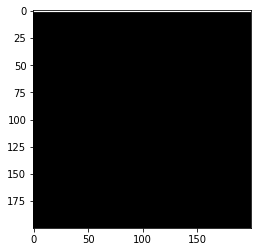

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()
for i in range(images.shape[0]):
  images[i][i*2 : i*2+2] = 255
plt.imshow(images[0])

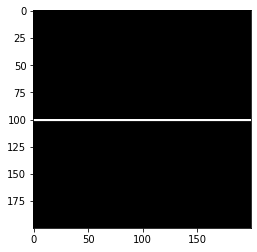

In [ ]:
plt.imshow(images[50])

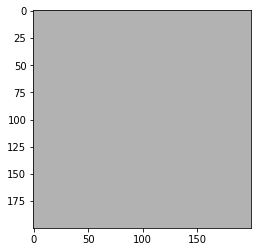

In [ ]:
plt.imshow((images.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.rand(2, 3, 4).uniform_().cuda()
b = torch.rand(1, 8, 3).uniform_().cuda()
c = b.reshape(2, 3, 4)
c = c.cpu()
a = a.cpu()
a = Variable(a)
c = Variable(c, requires_grad=True)
L = torch.mean((c - a)**2)
L.backward()
c.grad

tensor([[[-0.0348, -0.0100,  0.0343, -0.0149],
         [-0.0172, -0.0127, -0.0322, -0.0538],
         [-0.0094, -0.0361,  0.0123,  0.0046]],

        [[ 0.0019,  0.0668, -0.0108,  0.0518],
         [-0.0035, -0.0104, -0.0223, -0.0235],
         [-0.0402, -0.0469,  0.0186,  0.0653]]])